In [1]:
pip install -r /workspace/fraud-analysis/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.23.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.0 MB)
  Using cached pandas-1.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached matplotlib-3.3.1.tar.gz (38.8 MB)
  Preparing metadata (setup.py) ... done
  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Using cached ydata_profiling-4.4.0-py2.py3-none-any.whl (356 kB)
  Using cached plotly-4.12.0-py2.py3-none-any.whl (13.1 MB)
  Using cached ppscore-1.2.0.tar.gz (47 kB)
  Preparing metadata (setup.py) ... done
  Using cached streamlit-0.85.0-py2.py3-none-any.whl (7.9 MB)
  Using cached feature_engine-1.0.2-py2.py3-none-any.whl (152 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) .

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/fraud-analysis/Jupyter-Notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/fraud-analysis'

Load Data

In [5]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/Fraudulent_E-Commerce_Transactions.csv"
df = pd.read_csv(df_raw_path)
df.head(3)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,2024-02-20 05:58:41,bank transfer,electronics,1,17,Amandaborough,tablet,212.195.49.198,Unit 8934 Box 0058\nDPO AA 05437,Unit 8934 Box 0058\nDPO AA 05437,0,30,5
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,2024-03-18 03:42:55,PayPal,home & garden,2,22,Davismouth,tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, IL 15564","16282 Dana Falls Suite 790\nRothhaven, IL 15564",0,63,3


Investigate Data

In [6]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

[]

In [7]:
from ydata_profiling import ProfileReport
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

There are no variables with missing data


In [8]:
pip install ppscore==1.2.0

Defaulting to user installation because normal site-packages is not writeable
  Using cached ppscore-1.2.0.tar.gz (47 kB)
  Preparing metadata (setup.py) ... done
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1605 lines of output]
      Partial import of sklearn during the build process.
      setup.py:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status

In [9]:
import numpy as np
np.bool = np.bool_
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps



def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [10]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

/tmp/ipykernel_18484/1116723778.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_spearman = df.corr(method="spearman")
/tmp/ipykernel_18484/1116723778.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_pearson = df.corr(method="pearson")
/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/workspace/.pyenv_mirror/user/current/lib/python3.10/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which 

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count  mean    std  min  25%  50%  75%    max
ppscore  240.0   0.0  0.002  0.0  0.0  0.0  0.0  0.023


In [11]:
# DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
#                   df_corr_spearman = df_corr_spearman, 
#                   pps_matrix = pps_matrix,
#                   CorrThreshold = 0.4, PPS_Threshold =0.2,
#                   figsize=(12,10), font_annot=10)

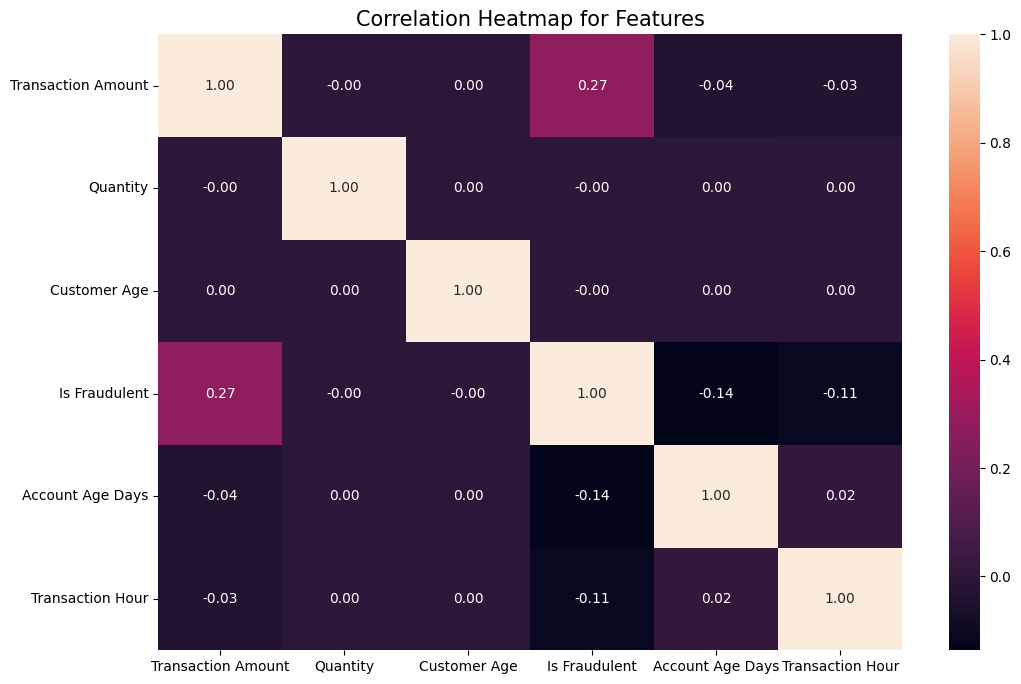

In [13]:
corr_data = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
sns.color_palette("hls", 8,) 
plt.title('Correlation Heatmap for Features', fontsize=15)
plt.show()

Clean Data

In [14]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [15]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType


In [16]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['Is Fraudulent'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1178361, 16) 
TestSet shape: (294591, 16)


In [17]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


##### IP Address, Customer ID and Transaction ID dropped as they are unique and Customer Age dropped as there is no way to confirm if this is a genuine age and transaction date doesn't give replicable information

In [18]:
variables_method = ['IP Address', 'Customer ID', 'Transaction ID', 'Customer Age', 'Transaction Date', 'Billing Address', 'Shipping Address', 'Customer Location']

print(f"* {len(variables_method)} variables to drop \n\n"
    f"{variables_method}")

* 8 variables to drop 

['IP Address', 'Customer ID', 'Transaction ID', 'Customer Age', 'Transaction Date', 'Billing Address', 'Shipping Address', 'Customer Location']


In [19]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)

In [20]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)

TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

In [21]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [ ]:
# pip install label_encoder


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

X = df.drop(['Is Fraudulent'], axis=1)
y = df['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

classification_report_rf = classification_report(y_test, y_pred)
confusion_matrix_rf = confusion_matrix(y_test, y_pred)

print(classification_report_rf)

NameError: name 'RandomForestClassifier' is not defined

Push to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/clean_data') 
except Exception as e:
  print(e)

Train Set

In [ ]:
TrainSet.to_csv("outputs/datasets/clean_data/TrainSet_Clean.csv", index=False)

Test Set

In [ ]:
TestSet.to_csv("outputs/datasets/clean_data/TestSet_Clean.csv", index=False)